# British Airways Predictive Model


We have a British Airways dataset with various attributes describing ticket booking. Our goal is to create a predictive model to determine whether a customer will book with British Airways based on these inputs.

In [1]:
#importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset

df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')


In [3]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [4]:
df.shape

(50000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


Calculating the percentage of distribution of sales channel

In [8]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [9]:
for_internet = df.sales_channel.value_counts().values[0]/df.sales_channel.count()*100
print((f"Percent of bookings done through internet: {for_internet} %"))

for_mobile = df.sales_channel.value_counts().values[1]/df.sales_channel.count()*100
print((f"Percent of bookings done through internet: {for_mobile} %"))

Percent of bookings done through internet: 88.764 %
Percent of bookings done through internet: 11.236 %


Calculating the percentage of distribution of trip types

In [10]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [11]:
for_round_trip = df.trip_type.value_counts().values[0]/df.trip_type.count()*100
print((f"Percent of RoundTrip: {for_round_trip} %"))

for_circle_trip = df.trip_type.value_counts().values[1]/df.trip_type.count()*100
print((f"Percent of Circletrip: {for_circle_trip} %"))

for_oneway = df.trip_type.value_counts().values[2]/df.trip_type.count()*100
print((f"Percent of Oneway: {for_oneway} %"))

Percent of RoundTrip: 98.994 %
Percent of Circletrip: 0.774 %
Percent of Oneway: 0.232 %


In [12]:
df['purchase_lead'].sort_values(ascending = False)

48259    867
24119    704
835      641
38356    633
39417    625
        ... 
39654      0
39340      0
29220      0
11633      0
3966       0
Name: purchase_lead, Length: 50000, dtype: int64

In [13]:
df[df['purchase_lead']>550]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
2058,2,Internet,RoundTrip,577,26,9,Mon,AKLKUL,New Zealand,0,0,0,8.83,0
2770,1,Internet,RoundTrip,557,22,19,Sat,BLRMEL,India,1,0,1,8.83,0
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
8770,2,Internet,RoundTrip,584,45,11,Sun,DELSYD,India,1,1,0,8.58,0
20832,2,Internet,RoundTrip,573,20,23,Sat,MELTRZ,Australia,1,0,0,8.83,0
20919,2,Internet,RoundTrip,564,17,16,Sun,MELURT,Australia,1,0,1,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
33240,2,Internet,RoundTrip,553,4,13,Wed,KBVTPE,Taiwan,1,0,0,4.67,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0


Clearing the purchase lead greater than 550 which is one and a half year as we assume it is unlikely that customer will book the tickets this advanced

In [14]:
df = df[df['purchase_lead'] < 550]
df.shape

(49986, 14)

Checking the day where the airline gets maximum booking

In [15]:
df.flight_day.value_counts()

Mon    8100
Wed    7672
Tue    7672
Thu    7423
Fri    6759
Sun    6551
Sat    5809
Name: flight_day, dtype: int64

Plotting for the top 10 countriesfrom which we get maximum bookings

In [16]:
top10_countries = df['booking_origin'].value_counts().head(10)
top10_countries

Australia      17867
Malaysia        7173
South Korea     4559
Japan           3884
China           3387
Indonesia       2369
Taiwan          2076
Thailand        2030
India           1267
New Zealand     1073
Name: booking_origin, dtype: int64

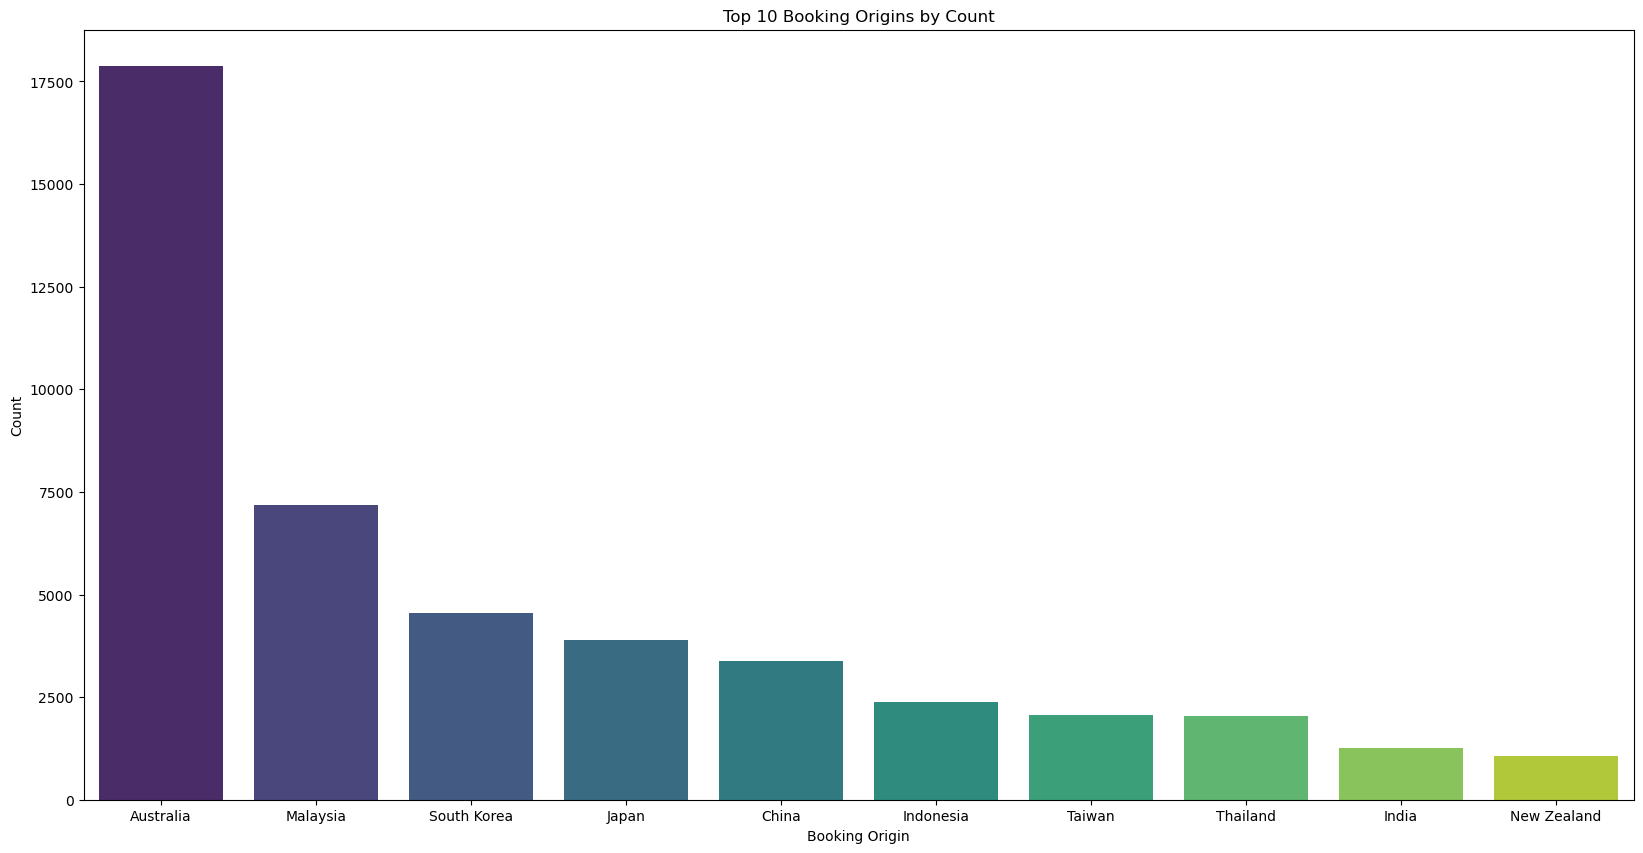

In [17]:
plt.figure(figsize = (20,10))
sns.countplot(x=df.booking_origin,order=top10_countries.index, palette='viridis')
plt.xlabel('Booking Origin')
plt.ylabel('Count')
plt.title('Top 10 Booking Origins by Count')
plt.show()

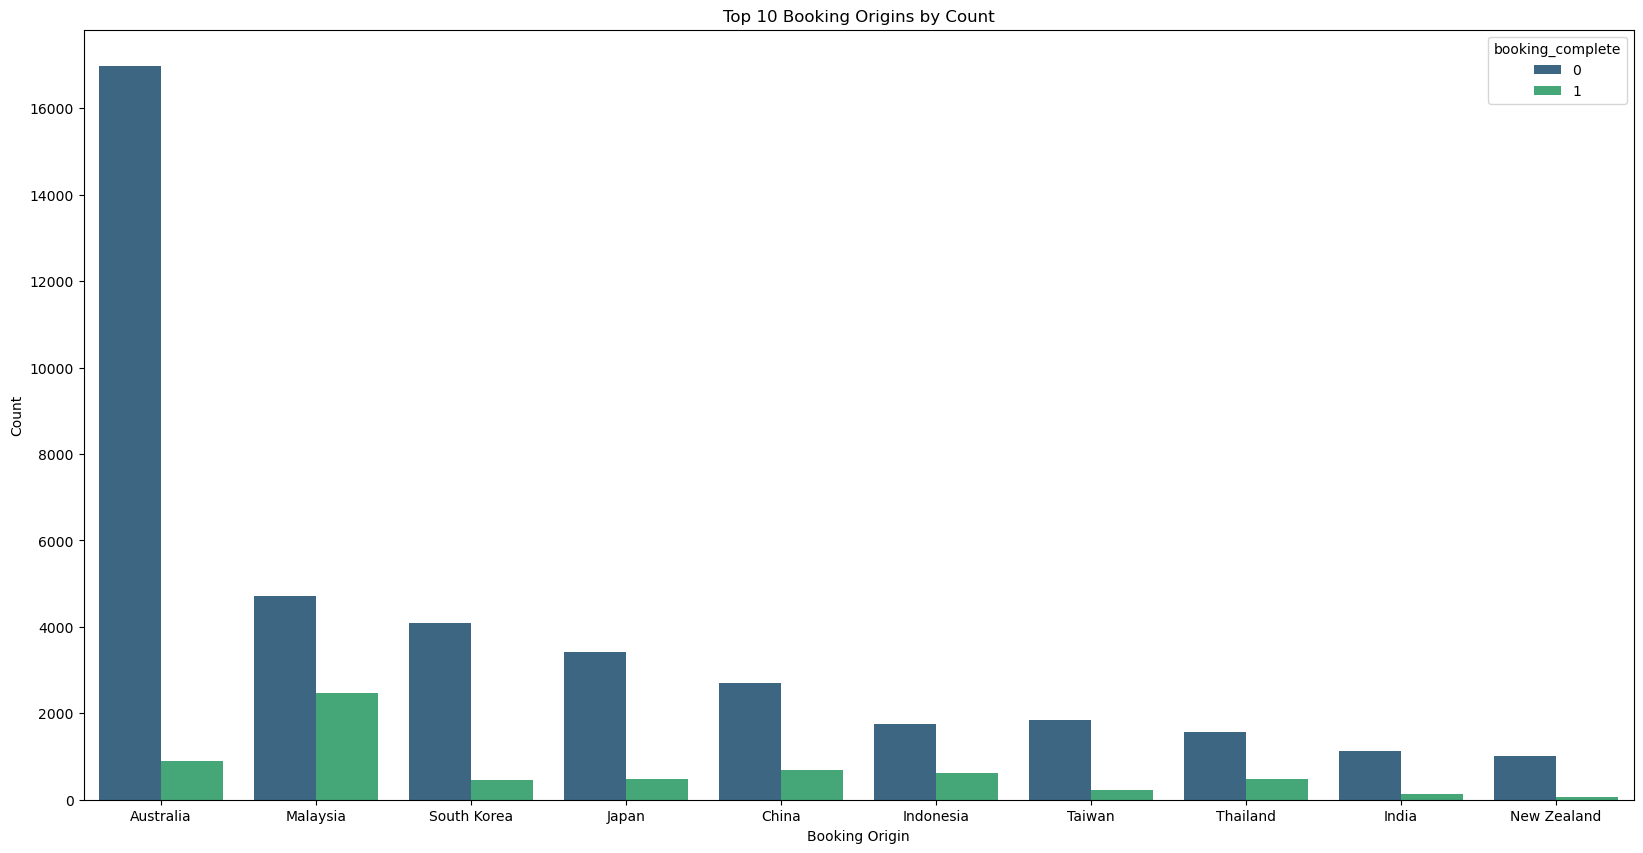

In [18]:
plt.figure(figsize = (20,10))
sns.countplot(x=df.booking_origin,order=top10_countries.index, palette='viridis', hue =df['booking_complete'])
plt.xlabel('Booking Origin')
plt.ylabel('Count')
plt.title('Top 10 Booking Origins by Count')
plt.show()

Checking the Percentage of bookings complete

In [19]:
df.booking_complete.unique()

array([0, 1], dtype=int64)

In [20]:
not_completed = df.booking_complete.value_counts().values[0]/df.booking_complete.count()*100
print((f"Percent of bookings not completed: {not_completed} %"))

completed = df.booking_complete.value_counts().values[1]/df.booking_complete.count()*100
print((f"Percent of bookings completed: {completed} %"))

Percent of bookings not completed: 85.04381226743489 %
Percent of bookings completed: 14.956187732565118 %


# Building Predictive Model

Before moving ahead to build our model we need to drop some unnecessay columns which has no significance for our target label

In [21]:
#dropping the columns

df_final = df.drop(columns = ['sales_channel','route'])
df_final

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0
1,1,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0
2,2,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0
3,1,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0
4,2,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,RoundTrip,27,6,9,Sat,Australia,1,0,1,5.62,0
49996,1,RoundTrip,111,6,4,Sun,Australia,0,0,0,5.62,0
49997,1,RoundTrip,24,6,22,Sat,Australia,0,0,1,5.62,0
49998,1,RoundTrip,15,6,11,Mon,Australia,1,0,1,5.62,0


In [22]:
#preprocessing our data to build the model, here we will use LabelEncdoer to perform label encoding to the object columns

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49986 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49986 non-null  int64  
 1   trip_type              49986 non-null  object 
 2   purchase_lead          49986 non-null  int64  
 3   length_of_stay         49986 non-null  int64  
 4   flight_hour            49986 non-null  int64  
 5   flight_day             49986 non-null  object 
 6   booking_origin         49986 non-null  object 
 7   wants_extra_baggage    49986 non-null  int64  
 8   wants_preferred_seat   49986 non-null  int64  
 9   wants_in_flight_meals  49986 non-null  int64  
 10  flight_duration        49986 non-null  float64
 11  booking_complete       49986 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 5.0+ MB


In [24]:
object_list = []

# Iterate through columns and check if they have an 'object' data type
for i in df_final.columns:
    if df_final[i].dtypes == 'object':
        object_list.append(i)

# Create a LabelEncoder instance
le = LabelEncoder()

# Iterate through the object-type columns and apply Label Encoding
for x in object_list:
    df_final[x] = le.fit_transform(df_final[x])


In [25]:
df_final

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,2,262,19,7,2,61,1,0,0,5.52,0
1,1,2,112,20,3,2,61,0,0,0,5.52,0
2,2,2,243,22,17,6,36,1,1,0,5.52,0
3,1,2,96,31,4,2,61,0,0,1,5.52,0
4,2,2,68,22,15,6,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,2,27,6,9,2,4,1,0,1,5.62,0
49996,1,2,111,6,4,3,4,0,0,0,5.62,0
49997,1,2,24,6,22,2,4,0,0,1,5.62,0
49998,1,2,15,6,11,1,4,1,0,1,5.62,0


In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49986 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49986 non-null  int64  
 1   trip_type              49986 non-null  int32  
 2   purchase_lead          49986 non-null  int64  
 3   length_of_stay         49986 non-null  int64  
 4   flight_hour            49986 non-null  int64  
 5   flight_day             49986 non-null  int32  
 6   booking_origin         49986 non-null  int32  
 7   wants_extra_baggage    49986 non-null  int64  
 8   wants_preferred_seat   49986 non-null  int64  
 9   wants_in_flight_meals  49986 non-null  int64  
 10  flight_duration        49986 non-null  float64
 11  booking_complete       49986 non-null  int64  
dtypes: float64(1), int32(3), int64(8)
memory usage: 4.4 MB


### Normalising the values 

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [28]:
X = df_final.drop(columns = ['booking_complete'])
Y = df_final['booking_complete']

X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

df_updated = pd.concat([X_scaled , Y], axis = 1)

df_updated


,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.400708,0.095338,1.968857,-0.119382,-0.381610,-0.527116,0.694106,0.703640,-0.650017,-0.863496,-1.174084,0.0
1,-0.579463,0.095338,0.302310,-0.089876,-1.120649,-0.527116,0.694106,-1.421181,-0.650017,-0.863496,-1.174084,0.0
2,0.400708,0.095338,1.757761,-0.030864,1.465988,1.443485,-0.069098,0.703640,1.538422,-0.863496,-1.174084,0.0
3,-0.579463,0.095338,0.124545,0.234692,-0.935889,-0.527116,0.694106,-1.421181,-0.650017,1.158082,-1.174084,0.0
4,0.400708,0.095338,-0.186544,-0.030864,1.096469,1.443485,-0.069098,0.703640,-0.650017,1.158082,-1.174084,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
49996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
49997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
49998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [29]:
df_updated.isnull().sum()

num_passengers           14
trip_type                14
purchase_lead            14
length_of_stay           14
flight_hour              14
flight_day               14
booking_origin           14
wants_extra_baggage      14
wants_preferred_seat     14
wants_in_flight_meals    14
flight_duration          14
booking_complete         14
dtype: int64

In [30]:
df_updated = df_updated.dropna()

In [31]:
df_updated.isnull().sum()

num_passengers           0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

<AxesSubplot:>

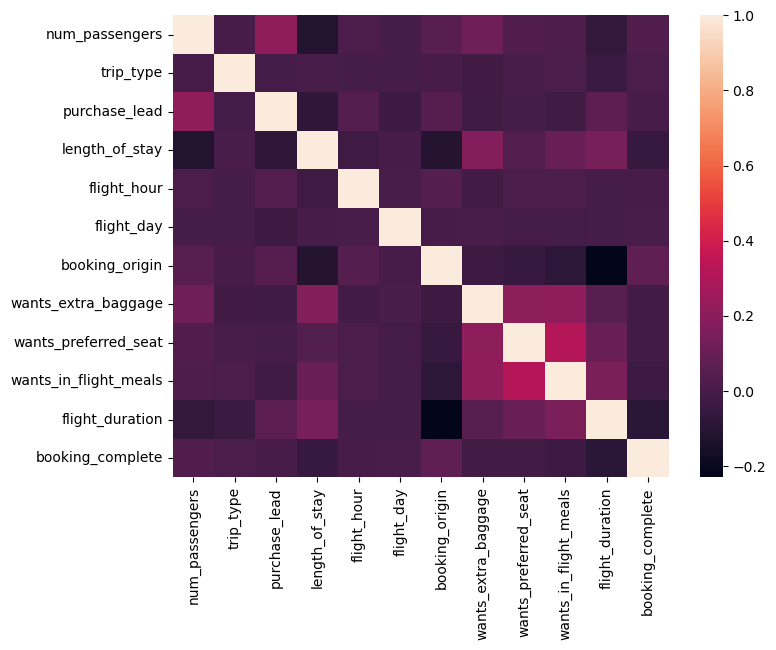

In [32]:
corr = df_updated.corr()

plt.figure(figsize=(8,6))

#plot the heatmap
sns.heatmap(corr)

In [33]:
X = df_updated.iloc[:,:-1]
Y = df_updated['booking_complete']

#splitting the data to build ML model

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 786)
x_train.shape , x_test.shape

((39977, 11), (9995, 11))

In [34]:
#importing RandomForest to predict the test data

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth =50 , min_samples_split=5)

In [35]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_split=5)

In [36]:
y_pred = rf.predict(x_test)

Checking the accuracy of our model

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report (includes precision, recall, and F1-score)
classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')

# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92      8501
         1.0       0.38      0.02      0.04      1494

    accuracy                           0.85      9995
   macro avg       0.62      0.51      0.48      9995
weighted avg       0.78      0.85      0.79      9995

Confusion Matrix:
[[8444   57]
 [1459   35]]
F1 Score: 0.04


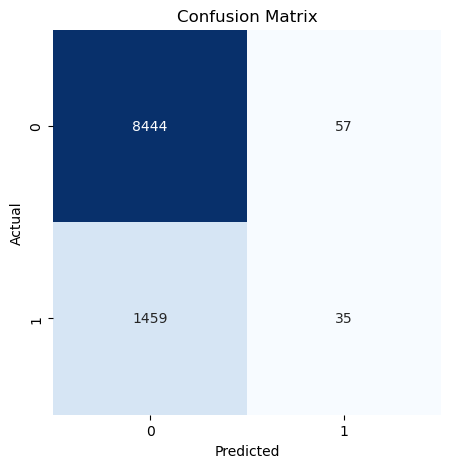

In [38]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

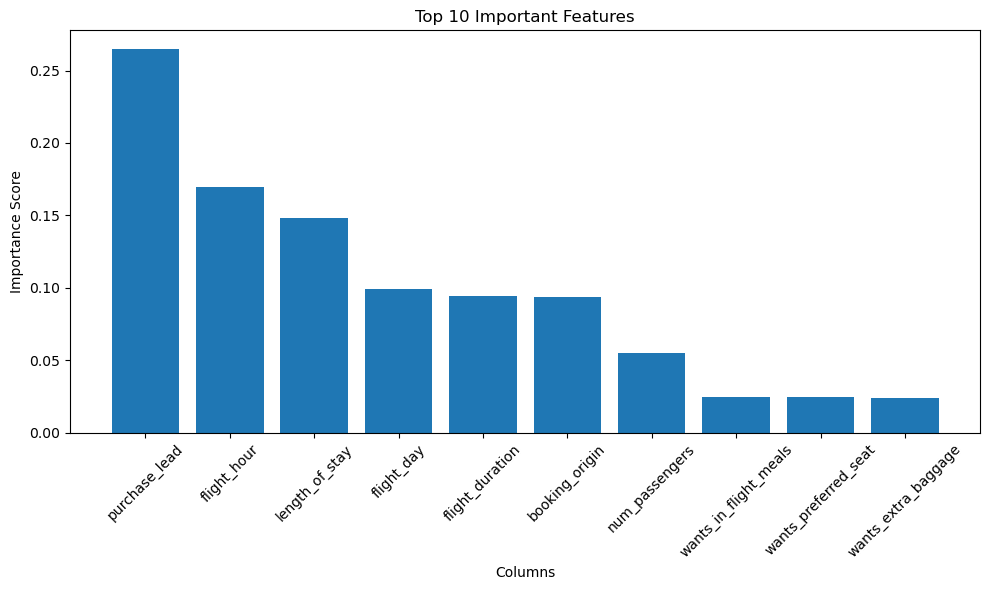

In [45]:
#plotting the most important features of the datset
import numpy as np

feature_importances = rf.feature_importances_
feature_names = df_updated.columns
sorted_idx = np.argsort(feature_importances)[::-1]

top_n = 10
top_features = sorted_idx[:top_n]
top_feature_names = [feature_names[i] for i in top_features]
top_feature_importances = [feature_importances[i] for i in top_features]

plt.figure(figsize=(10, 6))
plt.title("Top {} Important Features".format(top_n))
plt.bar(range(top_n), top_feature_importances, align="center")
plt.xticks(range(top_n), top_feature_names, rotation=45)
plt.xlabel("Columns")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()